# MA(q) Parameter Estimation

The moving average model of order $q$, denoted by $\text{MA}(q)$, is defined by,

$
\begin{align}
X_t = \sum_{i=1}^q \vartheta_i \varepsilon_{t-i} + \varepsilon_t
\end{align}
$

where $\varepsilon_t$ are independent and identically distributed random variables with distribution,

$
\begin{align}
\varepsilon_i \sim \text{Normal}(0, \sigma)
\end{align}
$

It follows that,

$
\begin{align}
&\text{E}[\varepsilon_t] = 0 \\
&\text{E}[\varepsilon_t^2] = \sigma^2 \\
&\text{E}[\varepsilon_t \varepsilon_s] = \delta_{ts} \sigma^2
\end{align}
$

Here the $\vartheta_i$ are estimated given an $MA(q)$ time series. 

## Includes

In [1]:
%reload_ext autoreload
%autoreload 2

# import system modules and set local import path
import os
import sys
import numpy
from matplotlib import pyplot

sys.path.insert(0, os.path.abspath('../..'))

# import local modules
from lib import plots
from lib import config
from lib import arima
from lib import stats
from lib.plot_config import DataPlotType

# Config Plot Style
pyplot.style.use(config.glyfish_style)

/Users/troy/.pyenv/versions/gly.fish.3.9.2/lib/python3.9/site-packages/pandas/compat/__init__.py:109: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


## Simulations ($\sigma = 1$)

In [2]:
nsample = 1000
σ = 1.0

θ1 = numpy.array([0.2])
ma1 = arima.maq(θ1, nsample, σ)

θ2 = numpy.array([0.2, 0.4])
ma2 = arima.maq(θ2, nsample, σ)

θ3 = numpy.array([0.2, 0.1, 0.4])
ma3 = arima.maq(θ3, nsample, σ)

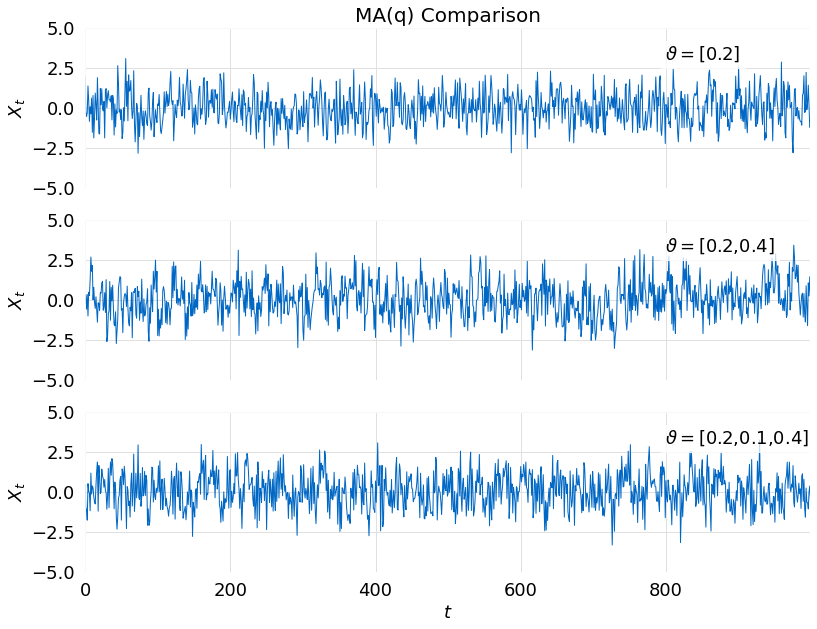

In [3]:
labels = [r"$\vartheta=$"+f"{numpy.array2string(θ1, precision=2, separator=',')}",
          r"$\vartheta=$"+f"{numpy.array2string(θ2, precision=2, separator=',')}",
          r"$\vartheta=$"+f"{numpy.array2string(θ3, precision=2, separator=',')}"]
title = "ΜΑ(q) Comparison"
samples = [ma1, ma2, ma3]
plots.stack(samples, ylim=[-5.0, 5.0], title=title, labels=labels, plot_type=DataPlotType.TIME_SERIES)

## Estimation of $\text{MA}(q)$ Parameters

$\text{MA}(q)$ parameters are estimated using `statsmodels.tsa.arima_model.ARMA`

### $\text{MA}(1)$ Example ($\varphi = 0.2$)

In [4]:
results = arima.ma_estimate(ma1, 1)
results.polynomial_ma, results.bse

(array([1.        , 0.22567246]), array([0.03849109, 0.03170886, 0.04684489]))

In [5]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(0, 0, 1)   Log Likelihood               -1411.869
Date:                Mon, 11 Apr 2022   AIC                           2829.738
Time:                        10:18:05   BIC                           2844.461
Sample:                             0   HQIC                          2835.334
                               - 1000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0012      0.038      0.032      0.975      -0.074       0.077
ma.L1          0.2257      0.032      7.117      0.000       0.164       0.288
sigma2         0.9858      0.047     21.045      0.000       0.894       1.078
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 2.66
Prob(Q):                              0.99   Prob(JB):                         0.26
Heteroskedasticity (H):               1.09   Skew:                             0.06
Prob(H) (two-sided):                  0.44   Kurtosis:                         2.78
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### $\text{MA}(2)$ Example ($\varphi = [0.2, 0.4]$)

In [6]:
results = arima.ma_estimate(ma2, 2)
results.polynomial_ma, results.bse

(array([1.        , 0.22191689, 0.42036122]),
 array([0.05329854, 0.02955023, 0.02971919, 0.04824053]))

In [7]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(0, 0, 2)   Log Likelihood               -1444.078
Date:                Mon, 11 Apr 2022   AIC                           2896.156
Time:                        10:18:05   BIC                           2915.787
Sample:                             0   HQIC                          2903.617
                               - 1000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0540      0.053      1.013      0.311      -0.050       0.158
ma.L1          0.2219      0.030      7.510      0.000       0.164       0.280
ma.L2          0.4204      0.030     14.144      0.000       0.362       0.479
sigma2         1.0511      0.048     21.789      0.000       0.957       1.146
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 0.47
Prob(Q):                              0.94   Prob(JB):                         0.79
Heteroskedasticity (H):               1.05   Skew:                            -0.02
Prob(H) (two-sided):                  0.64   Kurtosis:                         2.91
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### $\text{MA}(3)$ Example ($\varphi = [0.2, 0.1, 0.4]$)

In [8]:
results = arima.ma_estimate(ma3, 3)
results.polynomial_ma, results.bse

(array([1.        , 0.14655704, 0.0980737 , 0.37488956]),
 array([0.05263564, 0.03074711, 0.03121928, 0.02934627, 0.05042636]))

In [9]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(0, 0, 3)   Log Likelihood               -1442.921
Date:                Mon, 11 Apr 2022   AIC                           2895.842
Time:                        10:18:05   BIC                           2920.380
Sample:                             0   HQIC                          2905.168
                               - 1000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0716      0.053      1.361      0.174      -0.032       0.175
ma.L1          0.1466      0.031      4.767      0.000       0.086       0.207
ma.L2          0.0981      0.031      3.141      0.002       0.037       0.159
ma.L3          0.3749      0.029     12.775      0.000       0.317       0.432
sigma2         1.0486      0.050     20.795      0.000       0.950       1.147
===================================================================================
Ljung-Box (L1) (Q):                   0.14   Jarque-Bera (JB):                 3.86
Prob(Q):                              0.70   Prob(JB):                         0.15
Heteroskedasticity (H):               0.99   Skew:                            -0.08
Prob(H) (two-sided):                  0.91   Kurtosis:                         2.74
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Simulations ($\sigma = 5$)

In [10]:
nsample = 1000
σ = 5.0

θ1 = numpy.array([0.2])
ma1 = arima.maq(θ1, nsample, σ)

θ2 = numpy.array([0.2, 0.4])
ma2 = arima.maq(θ2, nsample, σ)

θ3 = numpy.array([0.2, 0.1, 0.4])
ma3 = arima.maq(θ3, nsample, σ)

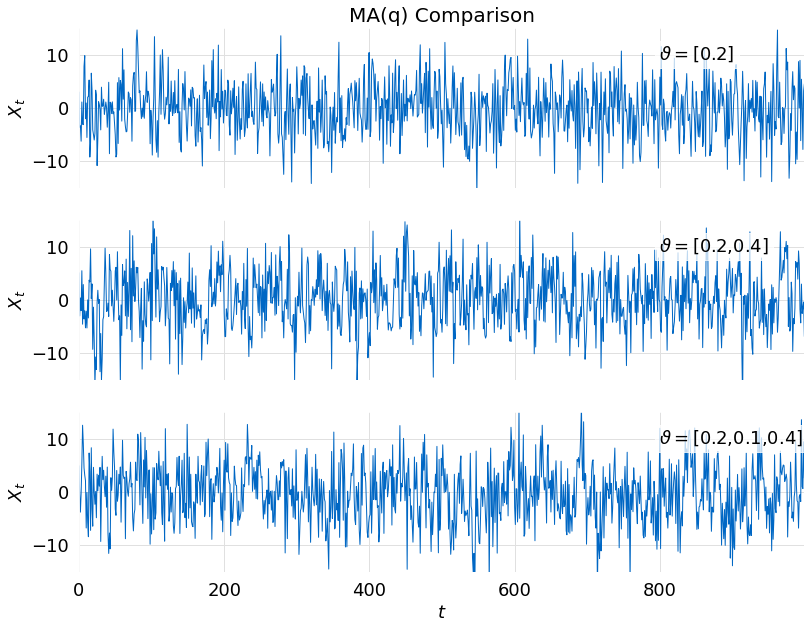

In [11]:
labels = [r"$\vartheta=$"+f"{numpy.array2string(θ1, precision=2, separator=',')}",
          r"$\vartheta=$"+f"{numpy.array2string(θ2, precision=2, separator=',')}",
          r"$\vartheta=$"+f"{numpy.array2string(θ3, precision=2, separator=',')}"]
title = "ΜΑ(q) Comparison"
samples = [ma1, ma2, ma3]
plots.stack(samples, ylim=[-15.0, 15.0], title=title, labels=labels, plot_type=DataPlotType.TIME_SERIES)

## Estimation of $\text{MA}(q)$ Parameters

$\text{MA}(q)$ parameters are estimated using `statsmodels.tsa.arima_model.ARMA`

### $\text{MA}(1)$ Example ($\varphi = 0.2$)

In [12]:
results = arima.ma_estimate(ma1, 1)
results.polynomial_ma, results.bse

(array([1.        , 0.18302254]), array([0.18436246, 0.03162179, 1.09131449]))

In [13]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(0, 0, 1)   Log Likelihood               -3013.548
Date:                Mon, 11 Apr 2022   AIC                           6033.097
Time:                        10:18:06   BIC                           6047.820
Sample:                             0   HQIC                          6038.692
                               - 1000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0922      0.184     -0.500      0.617      -0.454       0.269
ma.L1          0.1830      0.032      5.788      0.000       0.121       0.245
sigma2        24.2681      1.091     22.237      0.000      22.129      26.407
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):                 0.28
Prob(Q):                              0.78   Prob(JB):                         0.87
Heteroskedasticity (H):               1.15   Skew:                            -0.04
Prob(H) (two-sided):                  0.21   Kurtosis:                         2.99
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### $\text{MA}(2)$ Example ($\varphi = [0.2, 0.4]$)

In [14]:
results = arima.ma_estimate(ma2, 2)
results.polynomial_ma, results.bse

(array([1.        , 0.17399123, 0.38093274]),
 array([0.24716941, 0.02964488, 0.03050944, 1.0628394 ]))

In [15]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(0, 0, 2)   Log Likelihood               -3027.623
Date:                Mon, 11 Apr 2022   AIC                           6063.247
Time:                        10:18:06   BIC                           6082.878
Sample:                             0   HQIC                          6070.708
                               - 1000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3109      0.247      1.258      0.208      -0.174       0.795
ma.L1          0.1740      0.030      5.869      0.000       0.116       0.232
ma.L2          0.3809      0.031     12.486      0.000       0.321       0.441
sigma2        24.9537      1.063     23.478      0.000      22.871      27.037
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 3.56
Prob(Q):                              0.88   Prob(JB):                         0.17
Heteroskedasticity (H):               0.91   Skew:                            -0.10
Prob(H) (two-sided):                  0.39   Kurtosis:                         3.22
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### $\text{MA}(3)$ Example ($\varphi = [0.2, 0.1, 0.4]$)

In [16]:
results = arima.ma_estimate(ma3, 3)
results.polynomial_ma, results.bse

(array([1.        , 0.20337707, 0.11423241, 0.38326682]),
 array([0.26709539, 0.02917061, 0.02895931, 0.02830767, 1.10563864]))

In [17]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(0, 0, 3)   Log Likelihood               -3021.658
Date:                Mon, 11 Apr 2022   AIC                           6053.316
Time:                        10:18:06   BIC                           6077.855
Sample:                             0   HQIC                          6062.642
                               - 1000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2572      0.267     -0.963      0.336      -0.781       0.266
ma.L1          0.2034      0.029      6.972      0.000       0.146       0.261
ma.L2          0.1142      0.029      3.945      0.000       0.057       0.171
ma.L3          0.3833      0.028     13.539      0.000       0.328       0.439
sigma2        24.6549      1.106     22.299      0.000      22.488      26.822
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                 0.18
Prob(Q):                              0.87   Prob(JB):                         0.92
Heteroskedasticity (H):               1.04   Skew:                            -0.03
Prob(H) (two-sided):                  0.69   Kurtosis:                         3.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""